In [1]:
import rfest

from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
%matplotlib inline

from rfest._utils import get_sdm, SVD

## Generate toy dataset

RFEst comes with a simple data generator. Here we generated a stimulus-response pair with a 3D Difference-of-Gaussian filter.

In [2]:
((X, y), (X_test, y_test), 
 w_true) = rfest.make_data(dims=(5, 20, 15), sigma=(1.5, 1.5),
                           n_samples=2000, nsevar=0.025, 
                           filter_type='gaussian', seed=2046)
X = get_sdm(X, 5) # make stimulus design matrix                 

### ALD

In [3]:
dims = (5,20,15)
opt = rfest.ALD(X, y, dims=dims)

sigma0 = [1.]
rho0 = [1.]
params_t0 = [2., 2., 1., 1.] # taus, nus, tauf, nuf
params_y0 = [2., 10., 1., 1.]
params_x0 = [2., 7.5, 1., 1.]
init_params = sigma0 + rho0 + params_t0 + params_y0 + params_x0
opt.fit(initial_params=init_params, num_iters=5)

# Parameters for nu (locality) are not shown in progress. 

/Users/ziweih/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Iter	σ	ρ	τs_t	τf_t	τs_y	τf_y	τs_x	τf_x	cost
   0	0.990	0.990	1.990	1.010	1.990	1.010	1.990	1.010	-2414.695
   1	0.980	0.987	1.991	1.008	1.980	1.020	1.980	1.020	-2579.000
   2	0.970	0.981	1.987	1.010	1.970	1.030	1.970	1.030	-2728.567
   3	0.960	0.973	1.982	1.013	1.960	1.040	1.960	1.040	-2880.986
   4	0.950	0.965	1.976	1.018	1.950	1.050	1.950	1.050	-3030.388


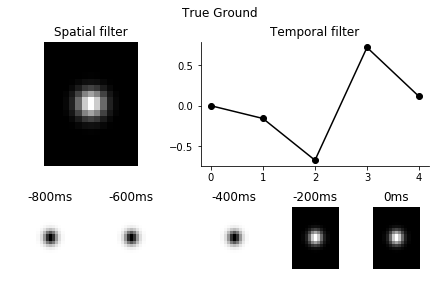

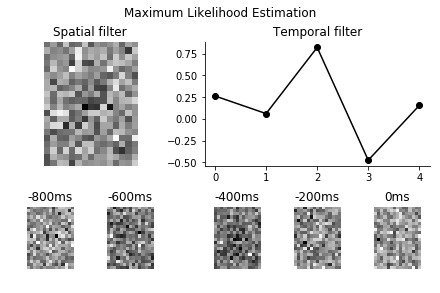

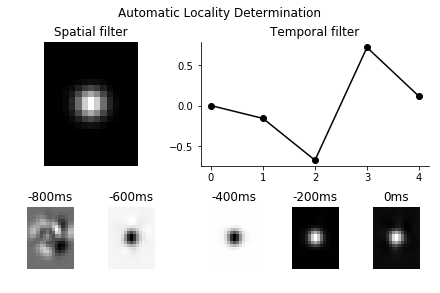

In [5]:
def plot_RF(k, dims, title=''):
    
    import matplotlib.gridspec as gridspec
    
    sRF, tRF = SVD(k, dims)
    
    fig = plt.figure(constrained_layout=True)
    spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)
    ax0 = fig.add_subplot(spec[:2, :2])
    ax0.imshow(sRF, origin='lower', cmap=plt.cm.binary)
    ax0.set_title('Spatial filter')
    ax0.axis('off')
    ax1 = fig.add_subplot(spec[:2, 2:])
    ax1.plot(tRF, 'ko-')
    ax1.set_title('Temporal filter')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
#     sns.despine(offset=3, trim=True)
    
    labels = ['-800ms', '-600ms', '-400ms', '-200ms', '0ms']
    for i in range(dims[0]):
        ax = fig.add_subplot(spec[2, i])
        ax.imshow(k.reshape(dims)[i], origin='lower', cmap=plt.cm.binary)
        ax.set_title(labels[i])
        ax.axis('off')
    
    fig.suptitle(title)

plot_RF(w_true, dims, 'True Ground')
plot_RF(opt.w_mle, dims, 'Maximum Likelihood Estimation')
plot_RF(opt.w_opt, dims, 'Automatic Locality Determination')